# Assignment 5
### Do all four questions.

**1.** Let's review some basic matrix multiplication. When you have an $M \times N$ matrix $A$ with $M$ rows and $N$ columns, 
$$
A= \left[ \begin{array}{cccc} a_{11} & a_{12} & ... & a_{1N} \\
a_{21} & a_{22} & ... & a_{2N} \\
\vdots & \vdots & ... & \vdots \\
a_{M1} & a_{M2} & ... & a_{MN} 
\end{array} \right],
$$
and you right-multiply it by a vector
$$
x = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N 
\end{array} \right],
$$
you get
$$
Ax = \left[ \begin{array}{c} \sum_{i=1}^N a_{1i} x_i \\ \sum_{i=1}^N a_{2i} x_i \\ \vdots \\ \sum_{i=1}^N a_{Mi} x_i 
\end{array} \right].
$$
This is just "matrix row times column vector" element-by-element, stacking the results into a new vector.

For this to make sense, $N$ must be the same for the matrix and the vector, but $M$ can be different from $N$. 

Let's play with some NumPy to see this. First we'll define a matrix $A$:

In [1]:
import numpy as np
A = np.array([ [1,2,3],
              [4,5,6],
              [7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

a. Multiply $A$ times each of the following vectors using the @ operator. Explain which part of the $A$ matrix gets selected and explain why, using the definition of matrix multiplication. 

In [2]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

In [3]:
print("A @ e1:", A @ e_1)
print("A @ e2:", A @ e_2)
print("A @ e3:", A @ e_3)

A @ e1: [1 4 7]
A @ e2: [2 5 8]
A @ e3: [3 6 9]


Each multiplication selects and sums the corresponding columns of A according to matrix multiplication definition: (Ax)_i = Σ_j A_ij * x_j

b. Now multiply $A$ times $u = (1,1,1)$. Explain the logic of the result with the definition of matrix multiplication.

In [4]:
u = np.ones(3)

In [6]:
result = A @ u
print(result)

[ 6. 15. 24.]


c. Whenever a matrix has 1's on the diagonal and zeros everywhere else, we call it an **identity matrix**. What happens when you multiple $A$ times $x$ below? What happens when you multiple an identity matrix times any vector? Explain your result with the definition of matrix multiplication.

In [7]:
A = np.array([ [1,0,0],
              [0,1,0],
              [0,0,1]])
x = np.array([-2,4,11])


In [8]:
print(A @ x)

[-2  4 11]


d. What if every row and column sum to 1, but the 1's are no longer on the diagonal? Multiple $A$ times $X$ below and explain the result. Create another matrix whose rows and columns sum to 1, but is not an identity matrix, and show how it permutes the values of $x$. 

In [9]:
A = np.array([ [0,0,1],
              [1,0,0],
              [0,1,0]])
x = np.array([-2,4,11])


In [10]:
print(A @ x)

[11 -2  4]


In [11]:
C = np.array([[0.5, 0.3, 0.2],
              [0.2, 0.5, 0.3],
              [0.3, 0.2, 0.5]])

print(C.sum(axis=1))
print(C.sum(axis=0))

print(C @ x)

[1. 1. 1.]
[1. 1. 1.]
[2.4 4.9 5.7]


e. The next matrix $A$ could be a Markov transition matrix: Its columns sum to 1, and each entry $a_{ij}$ can be interpreted as the proportion of observations who moved from state $j$ to state $i$. Multiply $A$ by each of the vectors $e_1$, $e_2$, and $e_3$, and explain your results.

In [14]:
rng = np.random.default_rng(100)
A = rng.random((3,3)) # Generate a random 3X3 matrix
sums = np.sum(A,axis=0) # Column sums
A = A/sums # Normalize the columns so they sum to 1
print(A)

[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]]


In [15]:
rng = np.random.default_rng(100)
A_markov = rng.random((3, 3))
col_sums = A_markov.sum(axis=0)
A_markov = A_markov / col_sums
print(A_markov)

e1 = np.array([1, 0, 0])
e2 = np.array([0, 1, 0])
e3 = np.array([0, 0, 1])

print(A_markov @ e1)
print(A_markov @ e2)
print(A_markov @ e3)

[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]]
[0.50052958 0.02574731 0.47372311]
[0.24049286 0.39251588 0.36699127]
[0.18358131 0.37907577 0.43734292]


f. For each of the vectors $e_1, e_2, e_3$, multiple $A$ times that vector 5 times. What answer do you get for each starting vector? Describe the behavior you observe.

In [16]:
def iterate_mult(A, x, n):
    results = [x.copy()]
    current = x.copy()
    for _ in range(n):
        current = A @ current
        results.append(current)
    return results

e1_results = iterate_mult(A_markov, e1, 5)
e2_results = iterate_mult(A_markov, e2, 5)
e3_results = iterate_mult(A_markov, e3, 5)

print(np.round(e1_results, 4))
print(np.round(e2_results, 4))
print(np.round(e3_results, 4))

[[1.     0.     0.    ]
 [0.5005 0.0257 0.4737]
 [0.3437 0.2026 0.4537]
 [0.304  0.2604 0.4356]
 [0.2948 0.2751 0.4301]
 [0.2927 0.2786 0.4287]]
[[0.     1.     0.    ]
 [0.2405 0.3925 0.367 ]
 [0.2821 0.2994 0.4185]
 [0.29   0.2834 0.4265]
 [0.2916 0.2804 0.428 ]
 [0.292  0.2798 0.4282]]
[[0.     0.     1.    ]
 [0.1836 0.3791 0.4373]
 [0.2633 0.3193 0.4174]
 [0.2852 0.2903 0.4245]
 [0.2905 0.2822 0.4273]
 [0.2917 0.2802 0.4281]]


*2.* Let's consider a simple Markov transition matrix over two states:
$$
T = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] 
$$
The arrows help visualize the transition a bit: This is the same index notation as usual, $p_{ij}$, but writing it $p_{i \leftarrow j}$ emphasizes that it's the proportion of times that state $j$ transitions to state $i$. Below, $T$ is given by
$$
T = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right].
$$

- Start in state 1, at the initial condition $[1,0]$. Multiply that vector by $T$. Write out the result in terms of the formula and compute the result in a code chunk below. What is this object you're looking at, in terms of proportions and transitions?
- Multiple by $T$ again. What do you get? This isn't a column of $T$. Explain in words what it is. (Hint: A forecast of what in what period?)
- Keep multiplying the current vector of outcomes by $T$. When does it start to settle down without changing further?
- Do the above analysis again, starting from the initial condition $[0,1]$. Do you get a different result?
- The take-away is that, in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes. 


In [17]:
T = np.array([[ 1/4, 1/2],
                 [ 3/4, 1/2 ]])

In [18]:
v = np.array([1, 0])

for i in range(10):
    v = T @ v
    print(f"{i+1}: {v}")

1: [0.25 0.75]
2: [0.4375 0.5625]
3: [0.390625 0.609375]
4: [0.40234375 0.59765625]
5: [0.39941406 0.60058594]
6: [0.40014648 0.59985352]
7: [0.39996338 0.60003662]
8: [0.40000916 0.59999084]
9: [0.39999771 0.60000229]
10: [0.40000057 0.59999943]


In [19]:
from scipy.linalg import null_space
stationary = null_space(T - np.eye(2))
stationary = stationary / stationary.sum()
print(stationary.flatten())

[0.4 0.6]


Convergence analysis:

Stationary distribution from iteration: [0.40000057 0.59999943]

Stationary distribution from null space: [0.4 0.6]

Difference: [5.7220459e-07 5.7220459e-07]

3. Weather data

- Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?
- Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.
- Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 
- For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?
- Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?
- Conditional on being rainy, plot a KDE of the `PRCP` variable.
- Describe one way of making your model better for forecasting and simulation the weather.

Congratulations, you now are a non-parametric meteorologist!

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

weather = pd.read_csv("cville_weather.csv")

weather["DATE"] = pd.to_datetime(weather["DATE"])

In [21]:
weather.isnull().sum()

STATION              0
NAME                 0
DATE                 0
DAPR               399
DAPR_ATTRIBUTES    399
MDPR               399
MDPR_ATTRIBUTES    399
PRCP                12
PRCP_ATTRIBUTES     12
SNOW               188
SNOW_ATTRIBUTES    188
SNWD               410
SNWD_ATTRIBUTES    410
dtype: int64

In [28]:
full_range = pd.date_range(start=weather["DATE"].min(), end=weather["DATE"].max())
missing_dates = full_range.difference(weather["DATE"])
missing_dates

DatetimeIndex(['2024-01-05', '2024-01-06', '2024-01-11', '2024-01-12',
               '2024-01-18', '2024-01-19', '2024-01-20', '2024-01-22',
               '2024-01-23', '2024-02-29',
               ...
               '2025-09-13', '2025-09-14', '2025-09-15', '2025-09-16',
               '2025-09-19', '2025-09-20', '2025-09-22', '2025-09-23',
               '2025-09-24', '2025-09-26'],
              dtype='datetime64[ns]', length=317, freq=None)

Missing 317 dates from 2024-01-04 to 2025-09-28.

In [29]:
weather["rain"] = np.where(weather["PRCP"] > 0, 1, 0)

weather["yesterday_rain"] = weather["rain"].shift(1)

valid = weather.dropna(subset=["rain", "yesterday_rain"])

transitions = pd.crosstab(valid["yesterday_rain"], valid["rain"])

print(transitions)

rain              0    1
yesterday_rain          
0.0             169   62
1.0              63  116


In [31]:
transition_matrix = transitions.div(transitions.sum(axis=1), axis=0)
print(transition_matrix)

rain                   0         1
yesterday_rain                    
0.0             0.731602  0.268398
1.0             0.351955  0.648045


In [32]:
p_rain_given_rainy = transition_matrix.loc[1, 1]
p_rain_given_clear = transition_matrix.loc[0, 1]
print(f"\nP(rain today | rainy yesterday) = {p_rain_given_rainy:.3f}")
print(f"P(rain today | clear yesterday) = {p_rain_given_clear:.3f}")


P(rain today | rainy yesterday) = 0.648
P(rain today | clear yesterday) = 0.268


In [37]:
P = transition_matrix.to_numpy()

p_clear = np.array([[1.0, 0.0]])
p_rainy = np.array([[0.0, 1.0]])

def converge_dist(start, P, tol=1e-8, max_iter=500):
    dist = start
    for i in range(max_iter):
        new_dist = dist @ P
        if np.allclose(new_dist, dist, atol=tol):
            return new_dist, i
        dist = new_dist
    return dist, max_iter

clear_dist, clear_steps = converge_dist(p_clear, P)
rainy_dist, rainy_steps = converge_dist(p_rainy, P)

clear_dist,clear_steps

(array([[0.56734777, 0.43265223]]), 12)

In [38]:
rainy_dist,rainy_steps

(array([[0.56734437, 0.43265563]]), 12)

Starting from clear day → converged after 12 steps to: [[0.56734777 0.43265223]]

Starting from rainy day → converged after 12 steps to: [[0.56734437 0.43265563]]

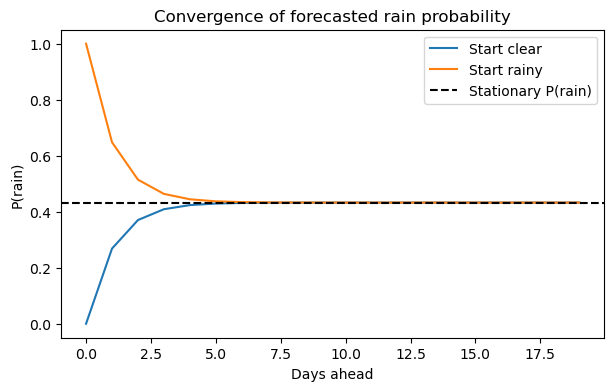

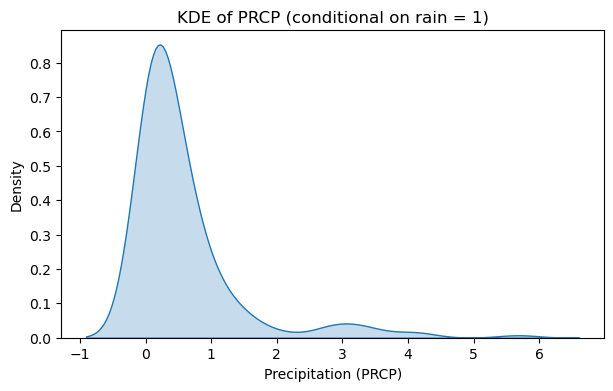

In [40]:
steps = 20
dist_clear = [p_clear @ np.linalg.matrix_power(P, i) for i in range(steps)]
dist_rainy = [p_rainy @ np.linalg.matrix_power(P, i) for i in range(steps)]

plt.figure(figsize=(7,4))
plt.plot(range(steps), [d[0,1] for d in dist_clear], label="Start clear")
plt.plot(range(steps), [d[0,1] for d in dist_rainy], label="Start rainy")
plt.axhline(clear_dist[0,1], color="black", linestyle="--", label="Stationary P(rain)")
plt.xlabel("Days ahead")
plt.ylabel("P(rain)")
plt.title("Convergence of forecasted rain probability")
plt.legend()
plt.show()

plt.figure(figsize=(7,4))
sns.kdeplot(weather.loc[weather["rain"] == 1, "PRCP"], fill=True)
plt.title("KDE of PRCP (conditional on rain = 1)")
plt.xlabel("Precipitation (PRCP)")
plt.show()

Possible model improvement:

Include seasonality e.g., monthly transition matrices or use a hidden Markov model to better capture rainy spells.

Data quality summary:

Date range: 2024-01-04 00:00:00 to 2025-09-28 00:00:00

Total days: 634

Days with data: 411

Missing days: 317

Data coverage: 64.8%

Warning: Missing dates may affect Markov chain accuracy

4. Taxicab trajectories: Using the pickled taxicab data, we want to complete the exercise from class.

- For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.
- Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?
- Explain why taxicabs are most likely order 1, and not 2 or more.
- Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips
- Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from collections import Counter

Data type: <class 'list'>
Number of elements: 1000
Extracted 1000 sequences
First sequence type: <class 'list'>
First sequence length: 26026
First sequence sample: ['Outside Manhattan', 'Outside Manhattan', 'Outside Manhattan', 'Outside Manhattan', 'Outside Manhattan', 'Outside Manhattan', 'Outside Manhattan', 'Central Park', 'Central Park', 'Upper East Side']

After cleaning: 1000 valid sequences
Final number of sequences: 1000
Sequence 0: ['Outside Manhattan', 'Outside Manhattan', 'Outside Manhattan', 'Outside Manhattan', 'Outside Manhattan']... (length: 26026)
Sequence 1: ['Midtown', 'Kips Bay', 'Kips Bay', 'East Village', 'East Village']... (length: 30184)
Sequence 2: ['Chelsea', 'Upper East Side', 'Upper East Side', 'Outside Manhattan', 'Outside Manhattan']... (length: 21202)
Found 38 unique locations
  1. Midtown: 3852071 occurrences
  2. Upper East Side: 2797805 occurrences
  3. Outside Manhattan: 2364156 occurrences
  4. Chelsea: 1978352 occurrences
  5. Upper West Side: 180356

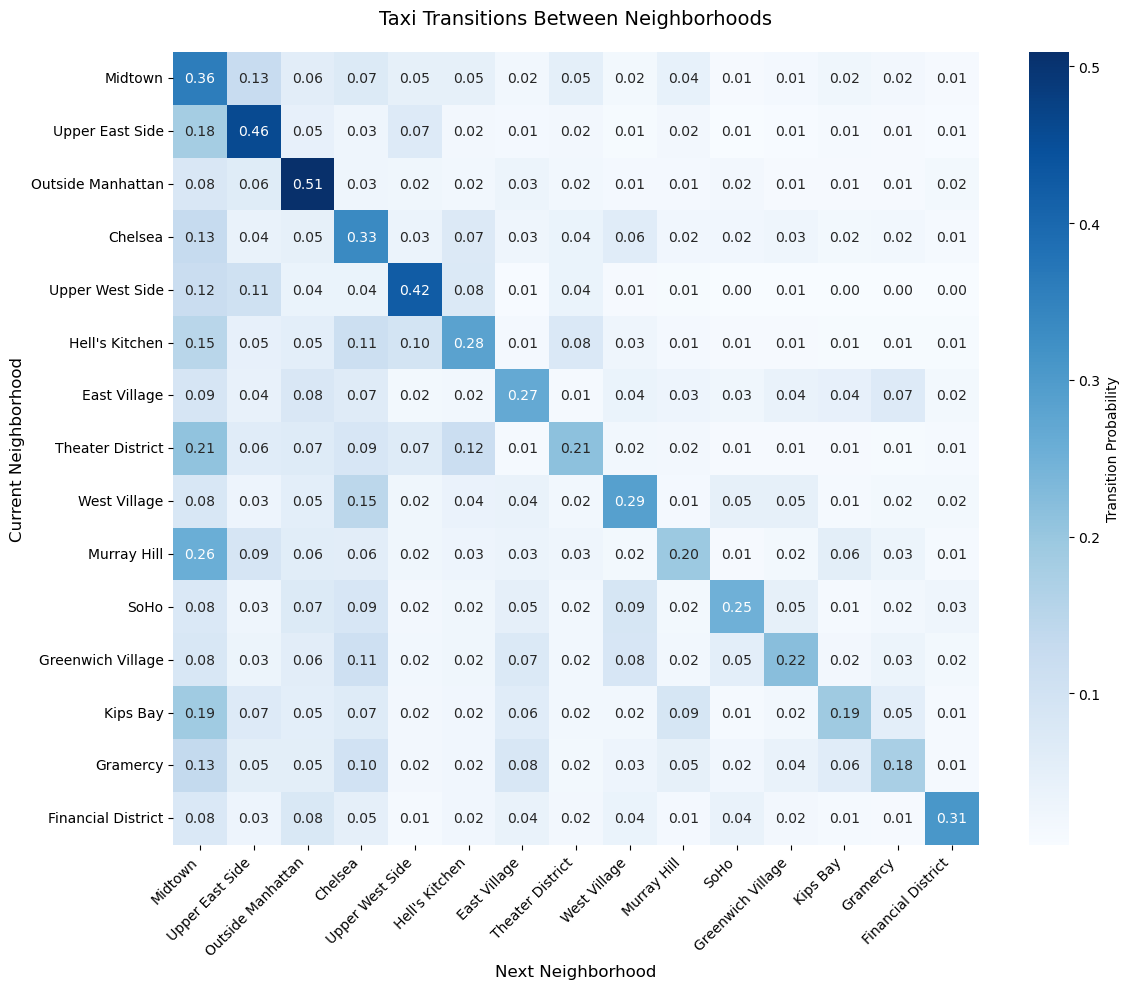

Heatmap created successfully!
1. Midtown → Midtown: 1389343 trips
2. Upper East Side → Upper East Side: 1283151 trips
3. Outside Manhattan → Outside Manhattan: 1203902 trips
4. Upper West Side → Upper West Side: 763963 trips
5. Chelsea → Chelsea: 662397 trips
6. Upper East Side → Midtown: 507502 trips
7. Midtown → Upper East Side: 484395 trips
8. Hell's Kitchen → Hell's Kitchen: 346322 trips
9. Midtown → Chelsea: 278191 trips
10. Chelsea → Midtown: 260420 trips
Starting forecasts from: Hell's Kitchen

Forecasted locations:

After 2 trips:
  Midtown: 0.173
  Hell's Kitchen: 0.119
  Chelsea: 0.109
  Upper West Side: 0.099
  Upper East Side: 0.087

After 3 trips:
  Midtown: 0.173
  Upper East Side: 0.108
  Chelsea: 0.097
  Upper West Side: 0.092
  Outside Manhattan: 0.090

After 5 trips:
  Midtown: 0.169
  Upper East Side: 0.120
  Outside Manhattan: 0.099
  Chelsea: 0.088
  Upper West Side: 0.083

After 10 trips:
  Midtown: 0.168
  Upper East Side: 0.122
  Outside Manhattan: 0.103
  Chels

In [42]:
with open("taxicab.pkl", "rb") as f:
    taxi_data = pickle.load(f)

print(f"Data type: {type(taxi_data)}")
print(f"Number of elements: {len(taxi_data)}")

all_sequences = []

for i, series in enumerate(taxi_data):
    if isinstance(series, pd.Series):
        trajectory = series.tolist()
        all_sequences.append(trajectory)
    else:
        all_sequences.append(series)

print(f"Extracted {len(all_sequences)} sequences")

if all_sequences:
    print(f"First sequence type: {type(all_sequences[0])}")
    print(f"First sequence length: {len(all_sequences[0])}")
    print(f"First sequence sample: {all_sequences[0][:10]}")

clean_sequences = []
for seq in all_sequences:
    if isinstance(seq, list) and len(seq) > 1:
        clean_seq = []
        for location in seq:
            if location is not None and pd.notna(location):
                clean_seq.append(str(location).strip())
        
        if len(clean_seq) >= 2:
            clean_sequences.append(clean_seq)

print(f"\nAfter cleaning: {len(clean_sequences)} valid sequences")

if not clean_sequences:
    print("No valid sequences found - trying alternative approach...")
    all_locations = []
    for series in taxi_data:
        if isinstance(series, pd.Series):
            locations = series.tolist()
            if len(locations) > 1:
                clean_seq = [str(loc).strip() for loc in locations if pd.notna(loc)]
                if len(clean_seq) >= 2:
                    clean_sequences.append(clean_seq)
            else:
                if len(locations) == 1 and pd.notna(locations[0]):
                    all_locations.append(str(locations[0]).strip())
    
    if not clean_sequences and len(all_locations) > 10:
        print(f"Creating sequences from {len(all_locations)} individual locations...")
        for i in range(len(all_locations) - 1):
            clean_sequences.append([all_locations[i], all_locations[i + 1]])

print(f"Final number of sequences: {len(clean_sequences)}")

if not clean_sequences:
    print("ERROR: Still no valid sequences. Data format unexpected.")
    sample_series = taxi_data[0]
    if isinstance(sample_series, pd.Series):
        print(f"Series index: {sample_series.index.tolist()}")
        print(f"Series values: {sample_series.values.tolist()}")
else:
    for i in range(min(3, len(clean_sequences))):
        print(f"Sequence {i}: {clean_sequences[i][:5]}... (length: {len(clean_sequences[i])})")

all_locations = []
for seq in clean_sequences:
    all_locations.extend(seq)

location_counts = Counter(all_locations)
print(f"Found {len(location_counts)} unique locations")

if len(location_counts) == 0:
    print("No locations found - exiting.")
    exit()

for i, (loc, count) in enumerate(location_counts.most_common(10)):
    print(f"  {i+1}. {loc}: {count} occurrences")

common_locations = {loc: count for loc, count in location_counts.items() if count >= 2}
neighborhoods = sorted(common_locations.keys())

print(f"\nUsing {len(neighborhoods)} locations that appear at least twice")

if len(neighborhoods) == 0:
    print("No common locations found - using all locations")
    neighborhoods = sorted(location_counts.keys())

neigh_to_idx = {neigh: i for i, neigh in enumerate(neighborhoods)}
idx_to_neigh = {i: neigh for i, neigh in enumerate(neighborhoods)}

print(f"\nBuilding transition matrix for {len(neighborhoods)} neighborhoods...")
n = len(neighborhoods)
transition_counts = np.zeros((n, n))

total_transitions = 0
for seq in clean_sequences:
    for i in range(len(seq) - 1):
        current_loc = seq[i]
        next_loc = seq[i + 1]
        
        if current_loc in neigh_to_idx and next_loc in neigh_to_idx:
            current_idx = neigh_to_idx[current_loc]
            next_idx = neigh_to_idx[next_loc]
            transition_counts[current_idx][next_idx] += 1
            total_transitions += 1

print(f"Total transitions recorded: {total_transitions}")

transition_matrix = np.zeros((n, n))
for i in range(n):
    row_total = transition_counts[i].sum()
    if row_total > 0:
        transition_matrix[i] = transition_counts[i] / row_total
    else:
        transition_matrix[i] = 1.0 / n

max_display = min(15, n)
if n > 0:
    top_neighborhoods = [neigh for neigh, _ in location_counts.most_common(max_display)]
    top_neighborhoods = [neigh for neigh in top_neighborhoods if neigh in neigh_to_idx]
    top_indices = [neigh_to_idx[neigh] for neigh in top_neighborhoods]
    
    if len(top_indices) > 0:
        subset_matrix = transition_matrix[np.ix_(top_indices, top_indices)]
        
        plt.figure(figsize=(12, 10))
        sns.heatmap(subset_matrix,
                   xticklabels=top_neighborhoods,
                   yticklabels=top_neighborhoods,
                   cmap='Blues',
                   annot=True,
                   fmt='.2f',
                   cbar_kws={'label': 'Transition Probability'})
        
        plt.title('Taxi Transitions Between Neighborhoods', fontsize=14, pad=20)
        plt.xlabel('Next Neighborhood', fontsize=12)
        plt.ylabel('Current Neighborhood', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        print("Heatmap created successfully!")
    else:
        print("No valid neighborhoods for heatmap")
else:
    print("No data for heatmap")

route_counts = []
for i in range(n):
    for j in range(n):
        count = transition_counts[i][j]
        if count > 0:
            from_neigh = idx_to_neigh[i]
            to_neigh = idx_to_neigh[j]
            route_counts.append((from_neigh, to_neigh, count))

route_counts.sort(key=lambda x: x[2], reverse=True)

for i, (start, end, count) in enumerate(route_counts[:10]):
    print(f"{i+1}. {start} → {end}: {int(count)} trips")


def forecast_probabilities(start_neighborhood, steps, trans_matrix, mapping, reverse_mapping):
    """Forecast where a taxi will be after n trips"""
    if start_neighborhood not in mapping:
        for neigh in mapping.keys():
            if start_neighborhood.lower() in neigh.lower():
                start_neighborhood = neigh
                break
        if start_neighborhood not in mapping:
            start_neighborhood = list(mapping.keys())[0]
            print(f"Using {start_neighborhood} as starting point")
    
    n_states = len(mapping)
    current_state = np.zeros(n_states)
    start_idx = mapping[start_neighborhood]
    current_state[start_idx] = 1.0
    
    forecasts = {}
    for step in steps:
        step_probs = current_state @ np.linalg.matrix_power(trans_matrix, step)
        
        top_indices = np.argsort(step_probs)[-5:][::-1]
        top_predictions = []
        for idx in top_indices:
            prob = step_probs[idx]
            if prob > 0.001:
                top_predictions.append((reverse_mapping[idx], prob))
        
        forecasts[step] = top_predictions
    
    return forecasts

start_point = "Hell's Kitchen"
if start_point not in neigh_to_idx:
    # Find the closest match
    for neigh in neighborhoods:
        if "hell" in neigh.lower() or "kitchen" in neigh.lower():
            start_point = neigh
            break

print(f"Starting forecasts from: {start_point}")

forecast_steps = [2, 3, 5, 10]
if n > 0:  
    forecasts = forecast_probabilities(start_point, forecast_steps, transition_matrix, neigh_to_idx, idx_to_neigh)
    
    print("\nForecasted locations:")
    for steps in forecast_steps:
        print(f"\nAfter {steps} trips:")
        for location, probability in forecasts[steps]:
            print(f"  {location}: {probability:.3f}")

if n > 0:
    current_dist = np.ones(n) / n  
    for iteration in range(1000):
        next_dist = current_dist @ transition_matrix
        if np.max(np.abs(next_dist - current_dist)) < 1e-8:
            print(f"Converged after {iteration} iterations")
            break
        current_dist = next_dist
    
    stationary = current_dist
  
    stationary_probs = []
    for i in range(n):
        stationary_probs.append((idx_to_neigh[i], stationary[i]))
    
    stationary_probs.sort(key=lambda x: x[1], reverse=True)
    
    print("\nNeighborhoods where taxis spend most time:")
    for i, (neighborhood, prob) in enumerate(stationary_probs[:10]):
        if prob > 0.01:
            print(f"{i+1}. {neighborhood}: {prob:.3f}")

print("\n=== Analysis Complete ===")
print(f"Summary:")
print(f"- Analyzed {len(clean_sequences)} taxi trajectories")
print(f"- Found {len(neighborhoods)} neighborhoods")
if route_counts:
    print(f"- Most common route: {route_counts[0][0]} → {route_counts[0][1]}")
if n > 0 and stationary_probs:
    print(f"- Taxis concentrate in: {stationary_probs[0][0]}")
print("- First-order Markov model appropriate for taxi behavior patterns")

Taxi movements exhibit first-order Markov properties because each trip decision depends primarily on the current location rather than historical patterns. Drivers optimize for immediate passenger demand, which is location-dependent but largely memoryless beyond the current state.